## Training FCN8 With CelebA Dataset
### By 10 epochs, 3200steps.

In [1]:
import os
import sys
import datetime

import PIL.Image as Image
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_DIR = os.path.join(os.getcwd(), '../..')
sys.path.append(ROOT_DIR)

In [2]:
from keras_segmentation.models.fcn import fcn_8 as M

Using TensorFlow backend.
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jho/anaconda3/

In [3]:
now = datetime.datetime.now()
NOW = "{:%Y%m%dT%H%M}".format(now)

OUT_DIR = os.path.join(ROOT_DIR, 'out')
CHECKPOINTS_DIR = os.path.join(OUT_DIR, 'checkpoints')
PREDICTIONS_DIR = os.path.join(OUT_DIR, 'predictions')
LOGS_DIR = os.path.join(OUT_DIR, 'logs')

DATASET_DIR = os.path.join(ROOT_DIR, 'dataset/celeba')

TRAIN_IMAGES = os.path.join(DATASET_DIR, 'train/original')
TRAIN_ANNOTATIONS = os.path.join(DATASET_DIR, 'train/mask_')
VAL_IMAGES = os.path.join(DATASET_DIR, 'val/original')
VAL_ANNOTATIONS = os.path.join(DATASET_DIR, 'val/mask_')

In [4]:
# Configurations
MODEL_NAME = 'fcn_8'

N_CLASSES = 3

I_HEIGHT = 218
I_WIDTH = 178

STEPS_PER_EPOCH = 3200
VAL_STEPS = 355

EPOCHS = 10

In [5]:
tag = 'celeba/{name}/ep{epochs}/st{steps}'.format(
    name=MODEL_NAME,
    epochs=EPOCHS,
    steps=STEPS_PER_EPOCH
)

PLOTS_DIR = os.path.join(OUT_DIR, 'plots')
CHECKPOINTS_DIR = os.path.join(CHECKPOINTS_DIR, tag)
PREDICTIONS_DIR = os.path.join(PREDICTIONS_DIR, tag)
LOGS_DIR = os.path.join(LOGS_DIR, tag)

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)
if not os.path.exists(CHECKPOINTS_DIR):
    os.makedirs(CHECKPOINTS_DIR)
if not os.path.exists(PREDICTIONS_DIR):
    os.makedirs(PREDICTIONS_DIR)
if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    
PLOT_PATH = os.path.join(PLOTS_DIR, 'model_{name}.svg'.format(name=MODEL_NAME))
    
dir_configuration = """
NOW = {now}
tag = {tag}
out_dir : {out_dir}
checkpoints_dir : {checkpoints_dir}
logs_dir : {logs_dir}
predictions_dir : {predictions_dir}

dataset_dir : {dataset_dir}
train_images : {train_images}
train_annotations : {train_annotations}
val_images : {val_images}
val_annotations : {val_annotations}

plot_path : {plot_path}
""".format(
    now=NOW,
    tag=tag,
    out_dir=OUT_DIR,
    checkpoints_dir=CHECKPOINTS_DIR,
    logs_dir=LOGS_DIR,
    predictions_dir=PREDICTIONS_DIR,

    dataset_dir=DATASET_DIR,
    train_images=TRAIN_IMAGES,
    train_annotations=TRAIN_ANNOTATIONS,
    val_images=VAL_IMAGES,
    val_annotations=VAL_ANNOTATIONS,
    plot_path=PLOT_PATH,
)
print(dir_configuration)


NOW = 20200420T1019
tag = celeba/fcn_8/ep10/st3200
out_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../out
checkpoints_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../out/checkpoints/celeba/fcn_8/ep10/st3200
logs_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../out/logs/celeba/fcn_8/ep10/st3200
predictions_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../out/predictions/celeba/fcn_8/ep10/st3200

dataset_dir : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../dataset/celeba
train_images : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../dataset/celeba/train/original
train_annotations : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../dataset/celeba/train/mask_
val_images : /home/jho/projects/image-segmentation-keras/train_faces/fcn8/../../dataset/celeba/val/original
val_annotations : /home/jho/projects/image-segmentation-keras/train_face

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


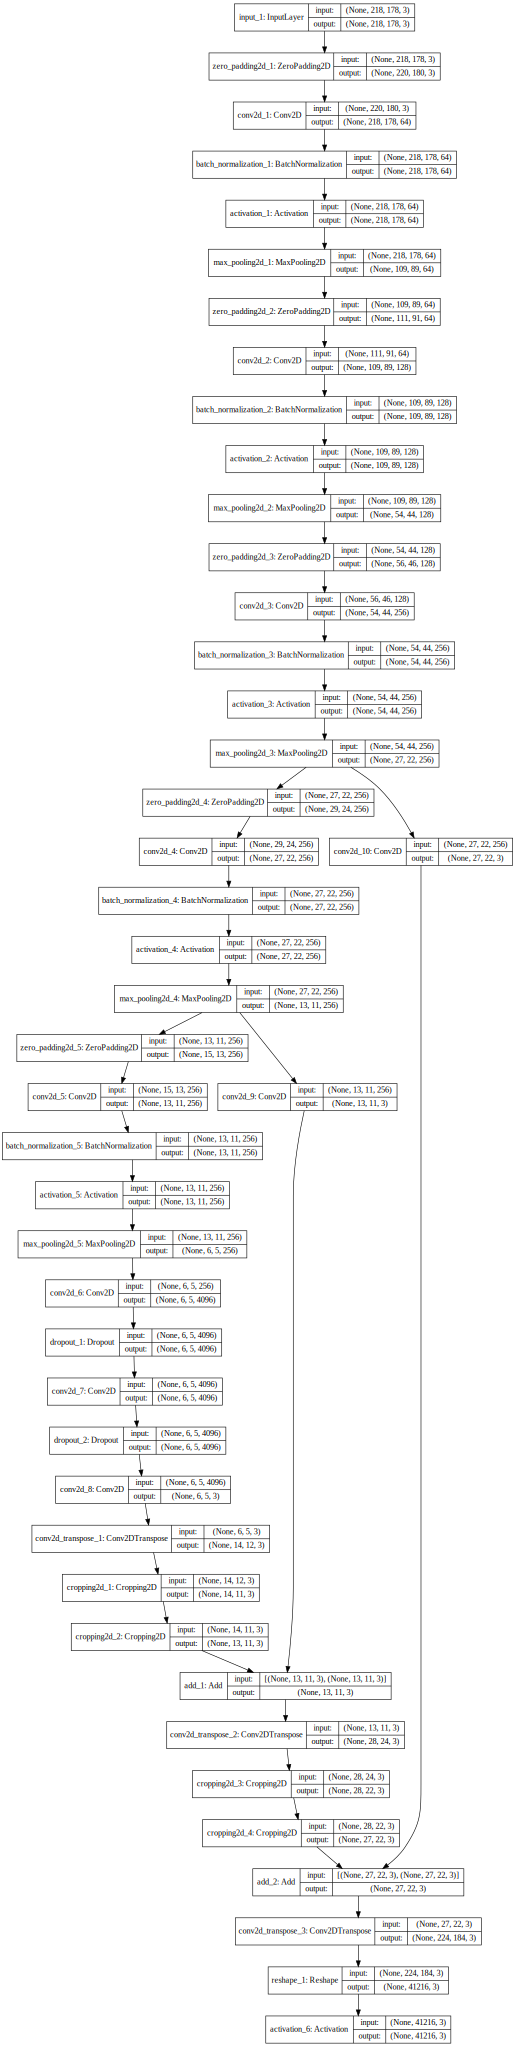

In [6]:
# Define model
model = M(n_classes=N_CLASSES, input_height=I_HEIGHT, input_width=I_WIDTH)
# model.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


plot_model(model, to_file=PLOT_PATH)
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
# Train
checkpoints_path = os.path.join(CHECKPOINTS_DIR, NOW)
logs_path = os.path.join(LOGS_DIR, NOW)

model.train(
    train_images = TRAIN_IMAGES,
    train_annotations = TRAIN_ANNOTATIONS,
    checkpoints_path=checkpoints_path,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    log_dir=logs_path,
    validate=True,
    val_images=VAL_IMAGES,
    val_annotations = VAL_ANNOTATIONS,
    val_steps = VAL_STEPS,
    save_best_only=True # Save model if 'val_loss' had been improved.
)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


  6%|▌         | 183/3200 [00:00<00:01, 1825.42it/s]

Verifying training dataset


100%|██████████| 355/355 [00:00<00:00, 1895.36it/s]


Dataset verified! 
Verifying validation dataset
Dataset verified! 
Start training with validation...
Epoch 1/10
1103/3200 [=========>....................] - ETA: 237s - loss: 0.3846 - acc: 0.8374

KeyboardInterrupt: 

In [ ]:
import random
val_list = os.listdir(VAL_IMAGES)
rand_val = random.choice(val_list)[:-4]
print(rand_val)

sample_test_image = os.path.join(VAL_IMAGES, rand_val + '.jpg')
sample_test_annotaion = os.path.join(VAL_ANNOTATIONS, rand_val + '.bmp')
out_fname = os.path.join(PREDICTIONS_DIR, 'out_{}_{}.png'.format(rand_val, NOW))

In [ ]:
# Out
out = model.predict_segmentation(
    inp=sample_test_image,
    out_fname=out_fname
)

In [ ]:
plt.imshow(Image.open(sample_test_image))

In [ ]:
plt.imshow(Image.open(sample_test_annotaion))

In [ ]:
plt.imshow(out)

In [ ]:
# evaluating the model
evaluation = model.evaluate_segmentation(inp_images_dir=VAL_IMAGES, annotations_dir=VAL_ANNOTATIONS)
print(evaluation)
